In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict 



In [2]:
def remove_missing_data(df):
        for col in df.columns:
            try:
                df[col].replace({".": np.nan}, inplace=True)
            except Exception as e:
                print(e, "\n No missing values in", col)

        return df.dropna()


In [3]:

sys.path.append("../codes")

import utilities as util



# Load data

In [4]:

data_sets_xls = pd.ExcelFile("../data/Fixation_report.xlsx")

print(data_sets_xls.sheet_names)




['dyslexia', 'risk', 'norm']


In [5]:

    
data_sets = defaultdict(list)


for sheet in data_sets_xls.sheet_names:
    tmp =  pd.read_excel(data_sets_xls, sheet)
    tmp = remove_missing_data(df=tmp)
    tmp.replace({"norm": 1, "risk": 2, "dyslexia":3, }, inplace=True)
    tmp = tmp.astype({
        "Group": int,
        "SubjectID": str,
        "Sentence_ID":int, 
        "Word_Number": int, 
        "FIX_X": float, 
        "FIX_Y": float, 
        "FIX_DURATION": float,
        })  

    data_sets[sheet] = tmp.sort_values(by=["SubjectID", "Sentence_ID", "Word_Number"]).dropna()

    print(sheet, tmp.shape)

    

dyslexia (59770, 7)
risk (26073, 7)
norm (143689, 7)


In [6]:

data_sets["norm"].head()



,Group,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
113895,1,10,4,1,177.3,531.8,219.0
113896,1,10,4,2,200.5,545.2,247.0
113897,1,10,4,3,282.7,542.4,261.0
113898,1,10,4,4,358.1,545.5,268.0
113899,1,10,4,4,392.8,536.3,129.0


In [7]:

data_sets["dyslexia"].head()



,Group,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
8260,3,ake05,4,1,167.0,554.9,216.0
8262,3,ake05,4,1,161.0,560.2,162.0
8261,3,ake05,4,2,201.8,562.7,420.0
8263,3,ake05,4,2,225.0,560.3,299.0
8265,3,ake05,4,2,216.2,562.9,393.0


In [8]:

data_sets["risk"].head()



,Group,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
13570,2,m107,4,1,157.6,570.7,229.0
13571,2,m107,4,2,225.0,572.7,222.0
13572,2,m107,4,2,196.3,571.8,210.0
13573,2,m107,4,2,258.5,569.4,167.0
13574,2,m107,4,3,323.5,561.6,178.0


In [9]:


data_dyslexia_cols = data_sets["dyslexia"].columns
data_norm_cols = data_sets["norm"].columns
data_risk_cols = data_sets["risk"].columns




In [10]:

set(data_dyslexia_cols == data_norm_cols)



{True}

In [11]:

set(data_norm_cols == data_risk_cols)



{True}

In [12]:

data = pd.concat([v for k, v in data_sets.items()], axis=0)
data.shape



(229532, 7)

In [13]:

data.head()



,Group,SubjectID,Sentence_ID,Word_Number,FIX_X,FIX_Y,FIX_DURATION
8260,3,ake05,4,1,167.0,554.9,216.0
8262,3,ake05,4,1,161.0,560.2,162.0
8261,3,ake05,4,2,201.8,562.7,420.0
8263,3,ake05,4,2,225.0,560.3,299.0
8265,3,ake05,4,2,216.2,562.9,393.0


In [14]:


set(data.columns == data_dyslexia_cols)



{True}

In [ ]:

# pd.get_dummies(data, columns=["Sex"])



In [ ]:

# dyslexia = data.loc[data["Group"]=="dyslexia"]

# dyslexia = data_sets["dyslexia"]



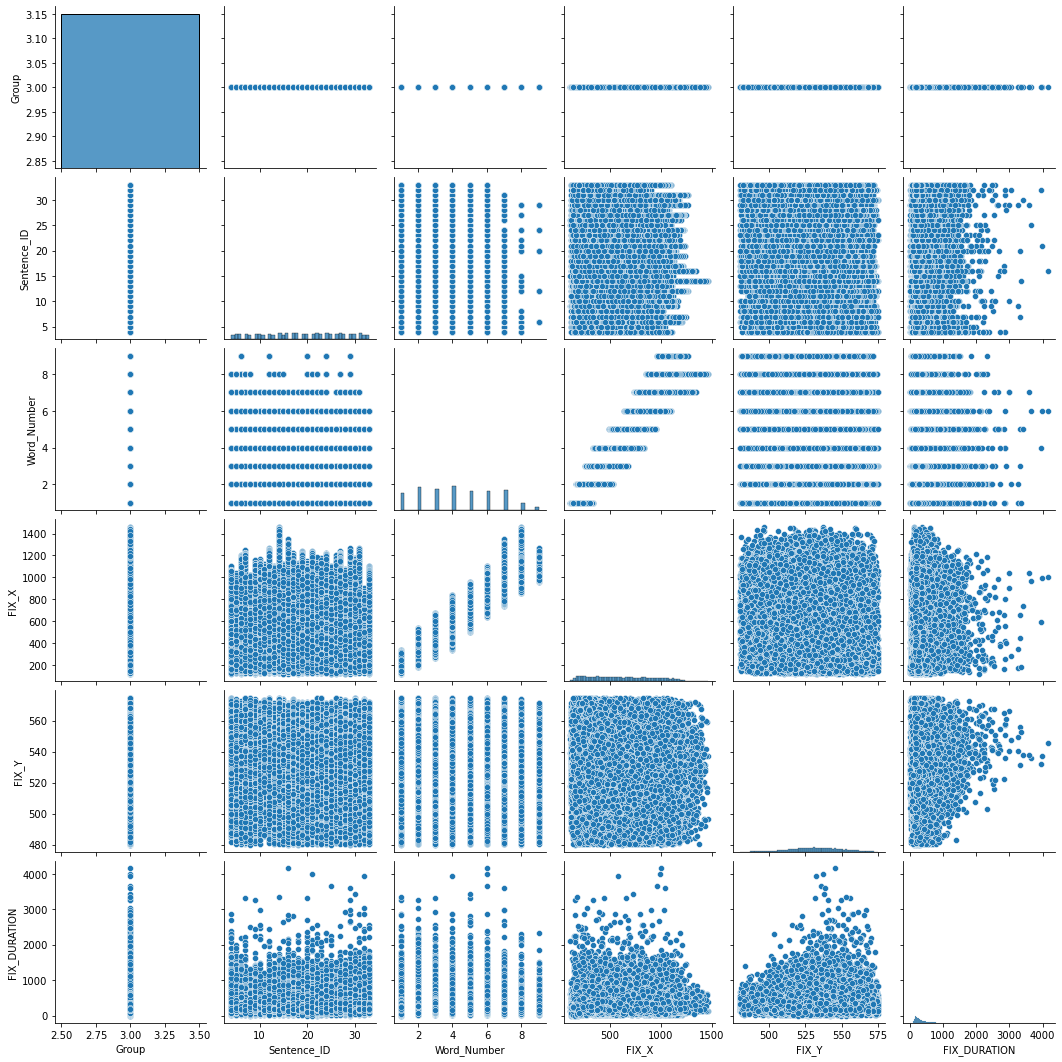

In [16]:

# Dyslexia pairplots:
sns.pairplot(data=data_sets["dyslexia"], )
plt.show()
    
    




- No linear correlation between any two pairs of the features


- Features distribution could be important 


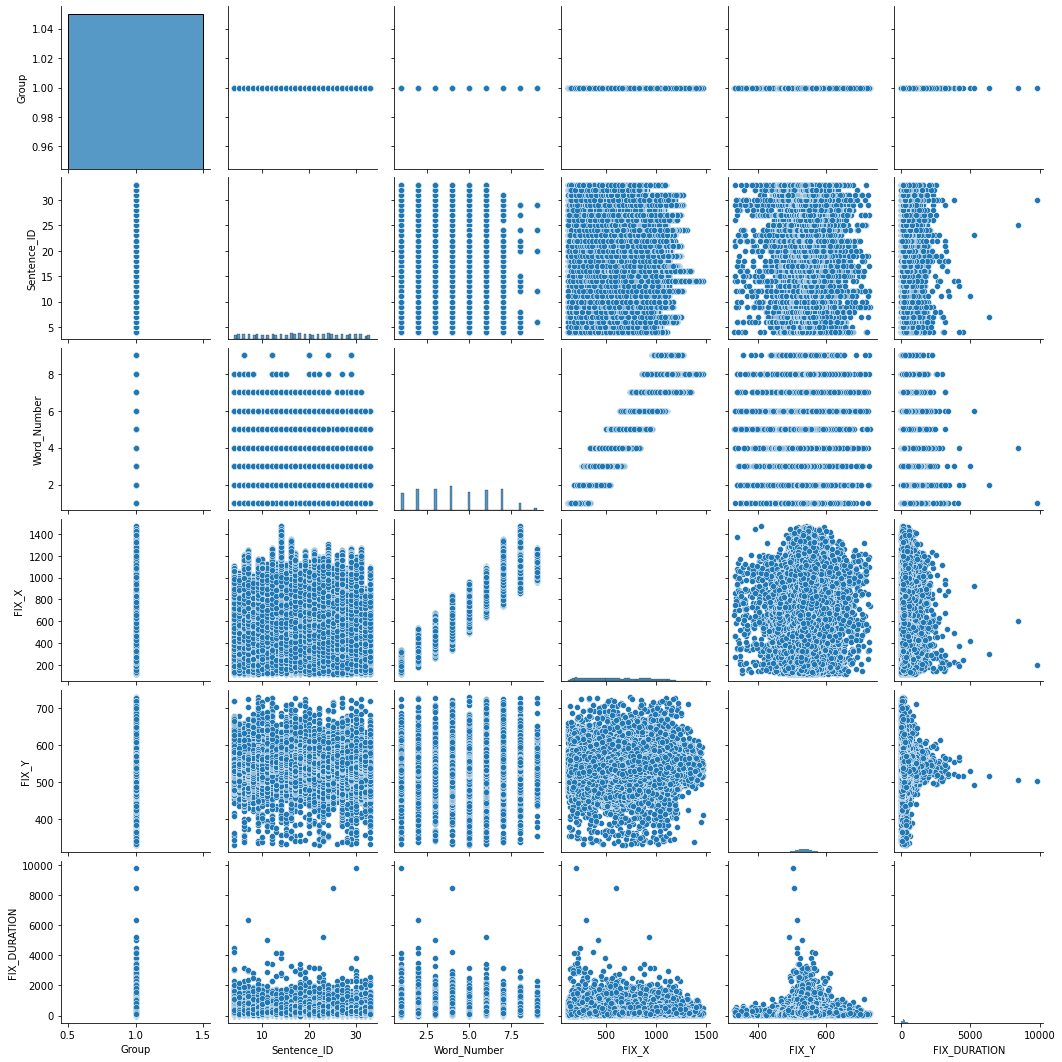

In [17]:

# Normal data pair-plots
sns.pairplot(data=data_sets["norm"], )
plt.show()





- No linear correlation between any two pairs of the features


- Features distribution could be important 



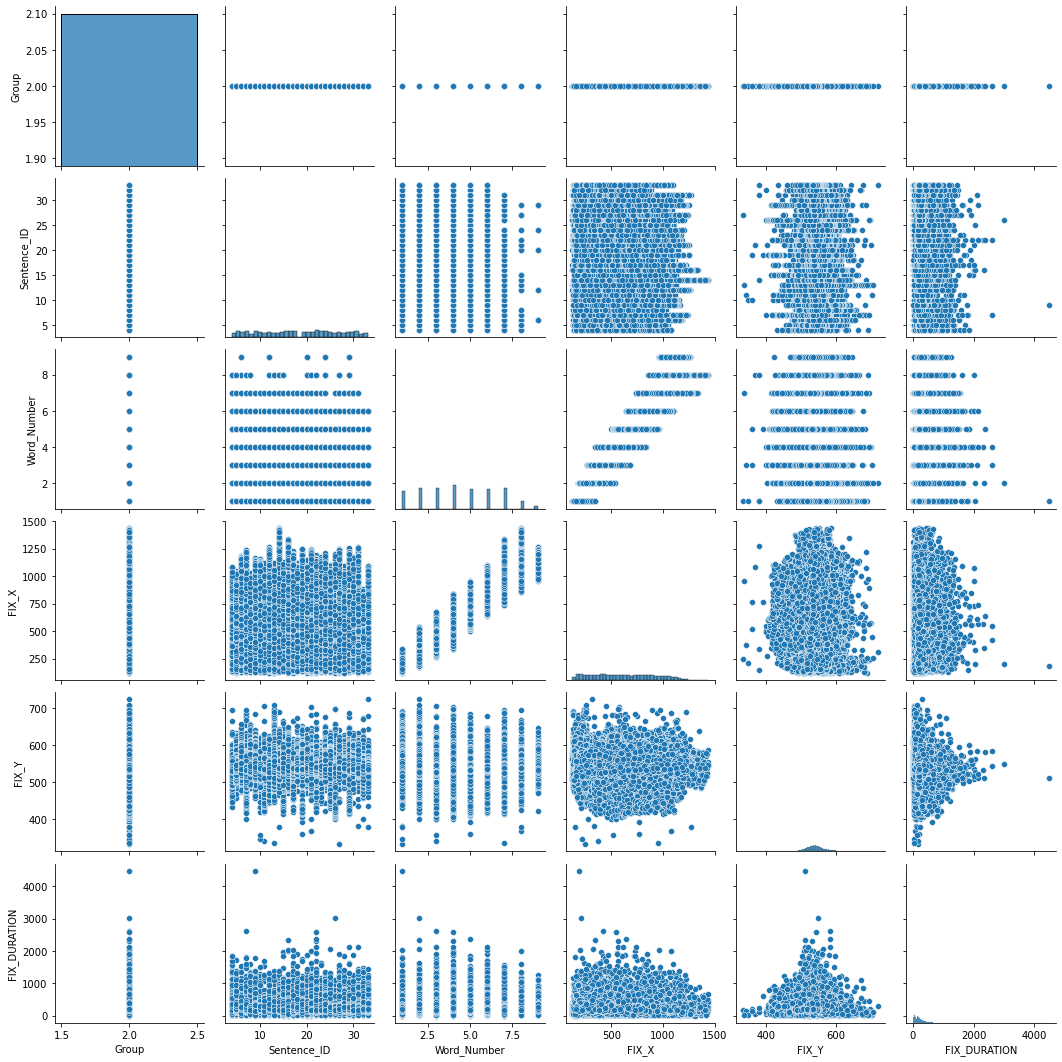

In [18]:


sns.pairplot(data=data_sets["risk"], )
plt.show()





- No linear correlation between any two pairs of the features

- features distribution could be important 




# Per Features plots

In [19]:
def plot_hists(data, col):
    
    colors = ["r", "y", "g"]
    fig = plt.figure(figsize=(20, 9))
    ctr = 1 
    for k, v in data.items():
        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = v[col].values
        bins = np.linspace(x.min(), x.max(), 40)
        ax.hist(x=x, bins=bins, color=colors[ctr-1])
        ax.set_title(k, fontsize=16)
        ctr += 1

    fig.suptitle(col + " Distributions", fontsize=19)
    plt.show()
    
    return None

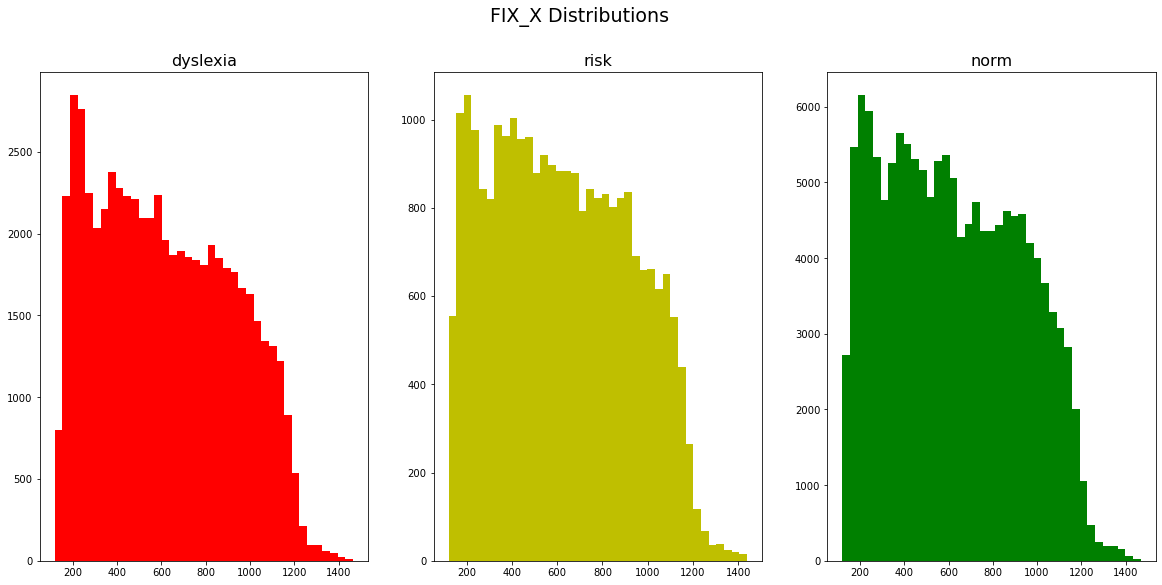

In [21]:


plot_hists(data=data_sets, col="FIX_X")



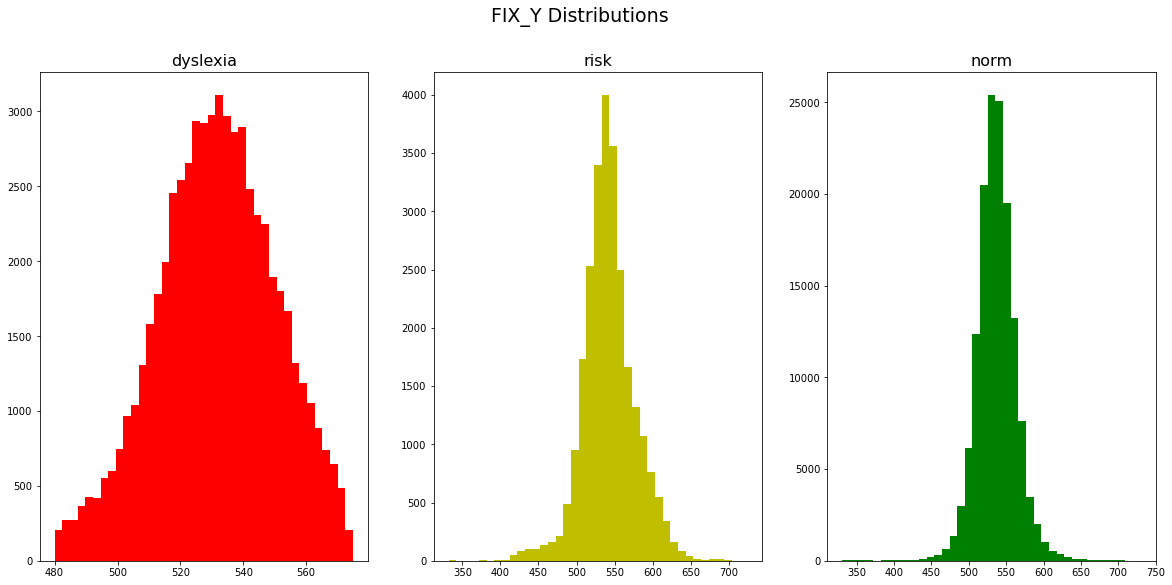

In [22]:


plot_hists(data=data_sets, col="FIX_Y")



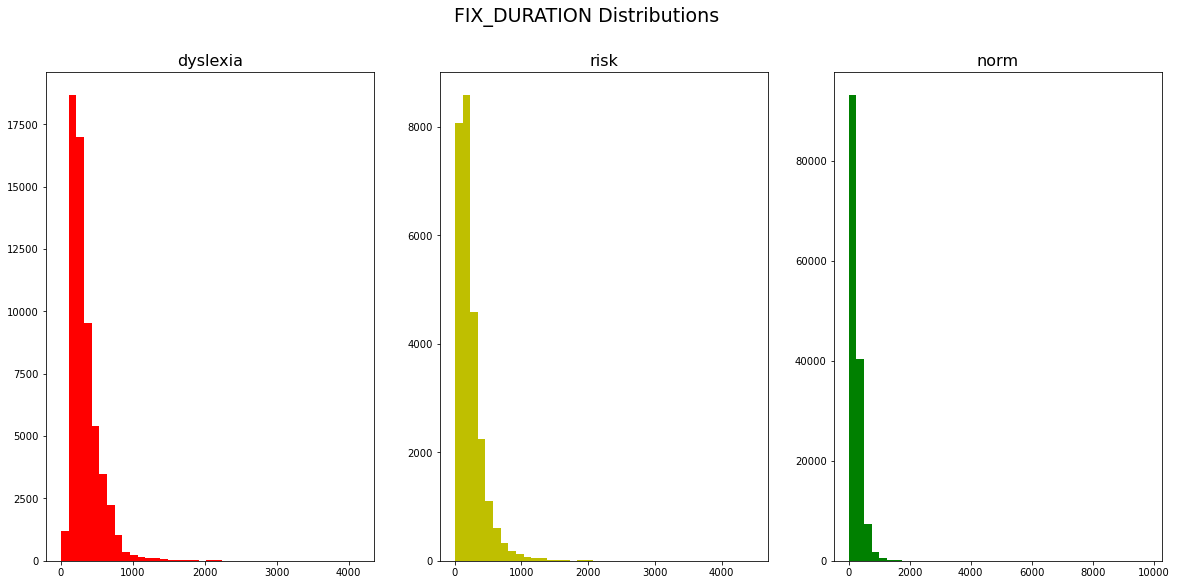

In [25]:


plot_hists(data=data_sets, col="FIX_DURATION")

# Plotting per word number 

In [26]:

def plot_per_sentence_per_user(data, sentence, norm_users, risk_users, dyslexic_users, index):
    
    N = min(len(norm_users), len(risk_users), len(dyslexic_users))
        
    if index > N:
        print("index is larger that number of at risk or dyslexic users")        
    assert not index > N
    

    features = list(data.columns)[4:]

    yn = data.loc[(data["Sentence_ID"] == sentence) &
                  (data["SubjectID"] == norm_users[index])
                 ]
    xn = yn["Word_Number"]

    yr = data.loc[(data["Sentence_ID"] == sentence) & 
                  (data["SubjectID"] == risk_users[index])
                 ]
    xr = yr["Word_Number"]

    yd = data.loc[(data["Sentence_ID"] == sentence) & 
                  (data["SubjectID"] == dyslexic_users[index])
                 ]
    xd = yd["Word_Number"]



    for f in features:

        fig = plt.figure(figsize=(13, 3))
        ax = fig.add_subplot(1, 1, 1)  # three datasets
        plt.plot(xn, yn[f], "g-.", linewidth=4, )
        plt.plot(xr, yr[f], "y-+", linewidth=2, )
        plt.plot(xd, yd[f], "r-o", linewidth=1, )
        plt.xlabel("Word Number", fontsize=10)
        plt.ylabel(f, fontsize=9)

        plt.legend(["Norm", "Risk", "Dyslexia"])

    plt.show()
    
    return yn, yr, yd





In [27]:


sentences = np.unique(data.Sentence_ID)
norm_users = np.unique(data.loc[data["Group"]==1].loc[:, "SubjectID"])
risk_users = np.unique(data.loc[data["Group"]==2].loc[:, "SubjectID"])
dyslexic_users = np.unique(data.loc[data["Group"]==3].loc[:, "SubjectID"])



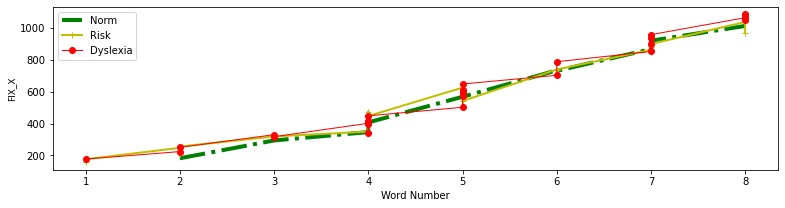

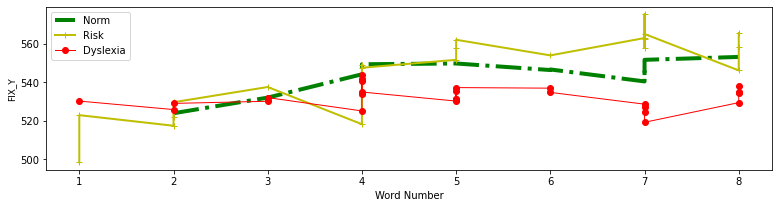

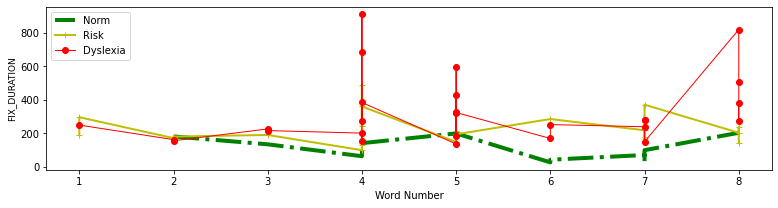

In [29]:


_ = plot_per_sentence_per_user(data, sentences[0], norm_users, risk_users, dyslexic_users, 1)



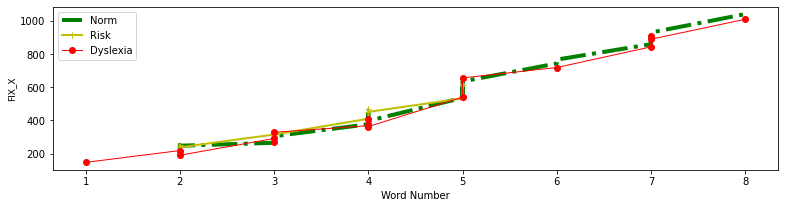

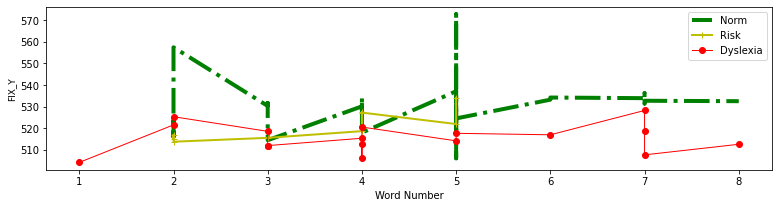

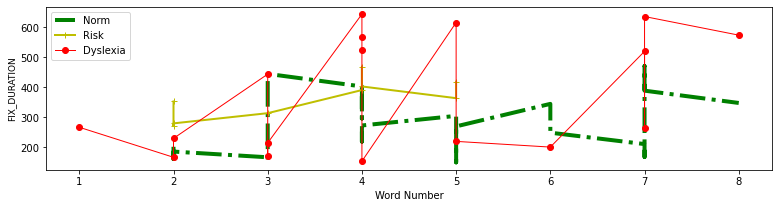

In [30]:


yn, yr, yd = plot_per_sentence_per_user(data, sentences[0], norm_users, risk_users, dyslexic_users, 10)



In [31]:


def plot_sevaral_sentences_per_user(data, sentences, norm_users, risk_users, dyslexic_users, index):
    
    N = min(len(norm_users), len(risk_users), len(dyslexic_users))
    markers = ["o", "s", "x", "+", "p", "*", "D", "v", "<", ",", ":"]
        
    if index > N:
        print("index is larger that number of at risk or dyslexic users")        
    assert not index > N
    

    features = list(data.columns)[4:]
        
    yn, yr, yd = [], [], []
    xn, xr, xd = [], [], []
    
    for sentence in sentences:
        
        _yn  = data.loc[(data["Sentence_ID"] == sentence) &
                      (data["SubjectID"] == norm_users[index])
                     ]
        yn.append(_yn)
        xn.append(_yn["Word_Number"])
        
        _yr = data.loc[(data["Sentence_ID"] == sentence) & 
                      (data["SubjectID"] == risk_users[index])
                     ]
        
        yr.append(_yr)
        xr.append(_yr["Word_Number"])
        
        _yd = data.loc[(data["Sentence_ID"] == sentence) & 
                      (data["SubjectID"] == dyslexic_users[index])
                     ]
        yd.append(_yd)
        
        xd.append(_yd["Word_Number"])
    
    for f in features:
        fig = plt.figure(figsize=(15, 4))
        ax = fig.add_subplot(1, 1, 1)  # three datasets
        for i in range(len(xn)): 
            
            plt.plot(xn[i], yn[i][f],
                     color='g', 
                     linestyle=':',
                     marker=markers[i],
                     markerfacecolor='green',
                     markersize=5,
                     linewidth=3, 
                     # alpha=1.0,
                     label="Norm-"+str(i+1),
                    )
            
            plt.plot(xr[i], yr[i][f],
                     color="y",
                     linestyle='-.',
                     marker=markers[i],
                     markerfacecolor='yellow',
                     markersize=4,
                     linewidth=2, 
                     label="Risk-"+str(i+1),
                     # alpha=0.5,
                    )
            
            plt.plot(xd[i], yd[i][f],
                     color="r",
                     linestyle='-',
                     marker=markers[i],
                     markerfacecolor='red',
                     markersize=5,
                     label="Dyslexia-"+str(i+1),
                     linewidth=1,
                    )
            
            plt.xlabel("Word Number", fontsize=10)
            plt.ylabel(f, fontsize=9)

        plt.legend()

    plt.show()
    
    return yn, yr, yd






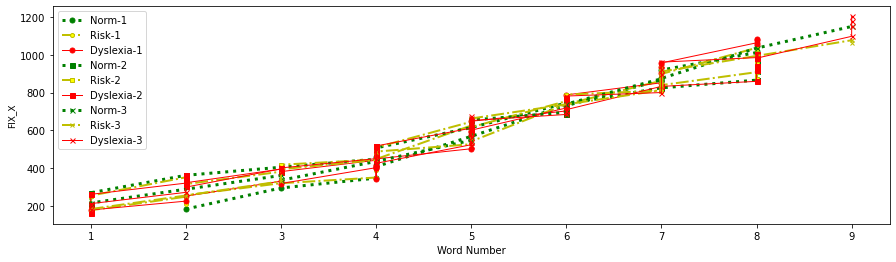

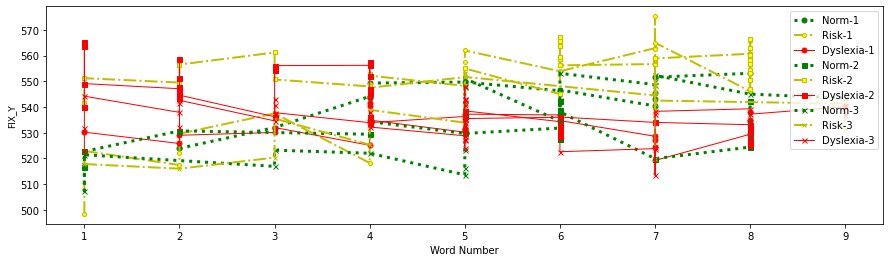

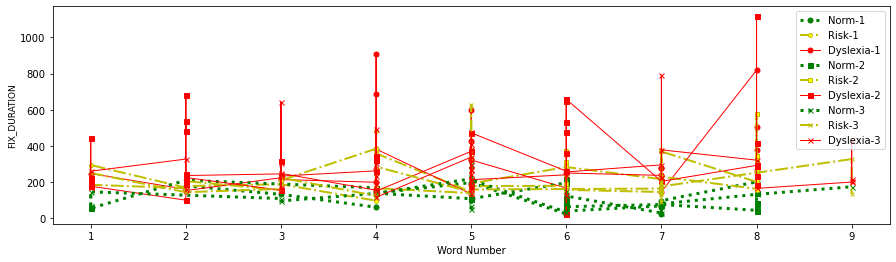

In [32]:


yn, yr, yd = plot_sevaral_sentences_per_user(data, sentences[:3],
                                             norm_users, risk_users, 
                                             dyslexic_users, 1)



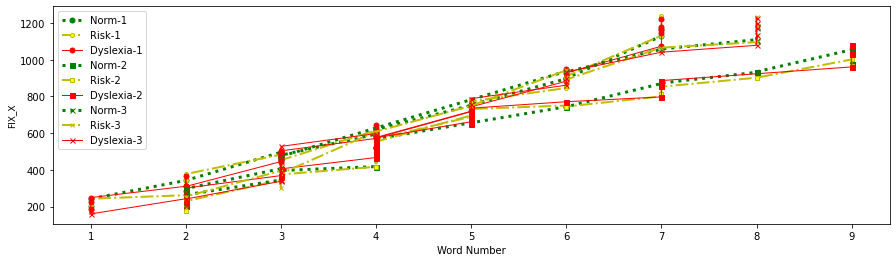

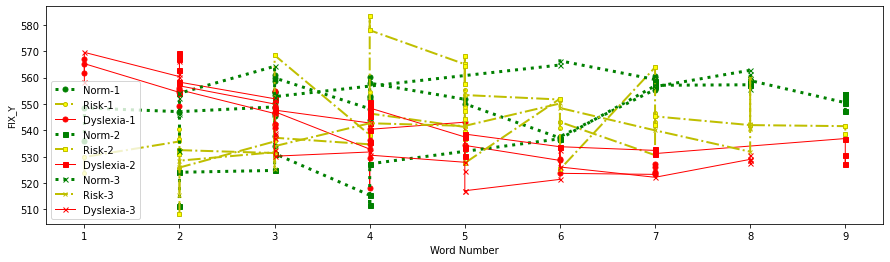

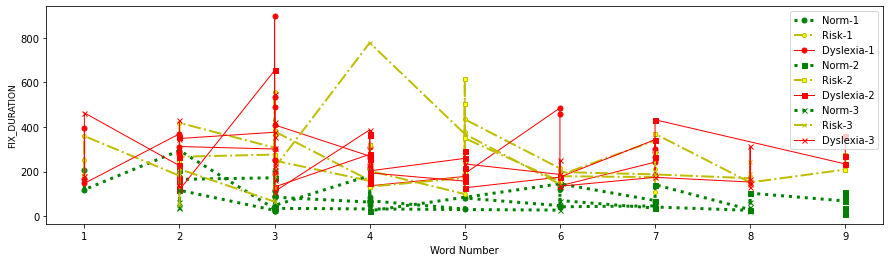

In [33]:

yn, yr, yd = plot_sevaral_sentences_per_user(data, sentences[15:18], 
                                             norm_users, risk_users, 
                                             dyslexic_users, 1)






#  Representatives: average and standard deviations


Since interpreting the above plots are difficult and time consuming, thus I decided to use means and std of the performance randomly selected users for the same set of sentences.






In [34]:


norm_means, norm_stds = [], []
risk_means, risk_stds = [], []
dyslexia_means, dyslexia_stds = [], []

for sentence in sentences:
    yn = data.loc[
        (data["Sentence_ID"] == sentence) &
        (data["SubjectID"].isin(norm_users))
    ]

    norm_means.append(yn.iloc[:, 4:].mean(axis=0))
    norm_stds.append(yn.iloc[:, 4:].std(axis=0))
    
    yr = data.loc[
        (data["Sentence_ID"] == sentence) &
        (data["SubjectID"].isin(risk_users))
    ]
    
    risk_means.append(yr.iloc[:, 4:].mean(axis=0))
    risk_stds.append(yr.iloc[:, 4:].std(axis=0))
    
    
    yd = data.loc[
        (data["Sentence_ID"] == sentence) &
        (data["SubjectID"].isin(dyslexic_users))
    ]
    dyslexia_means.append(yd.iloc[:, 4:].mean(axis=0))
    dyslexia_stds.append(yd.iloc[:, 4:].std(axis=0))
    
    

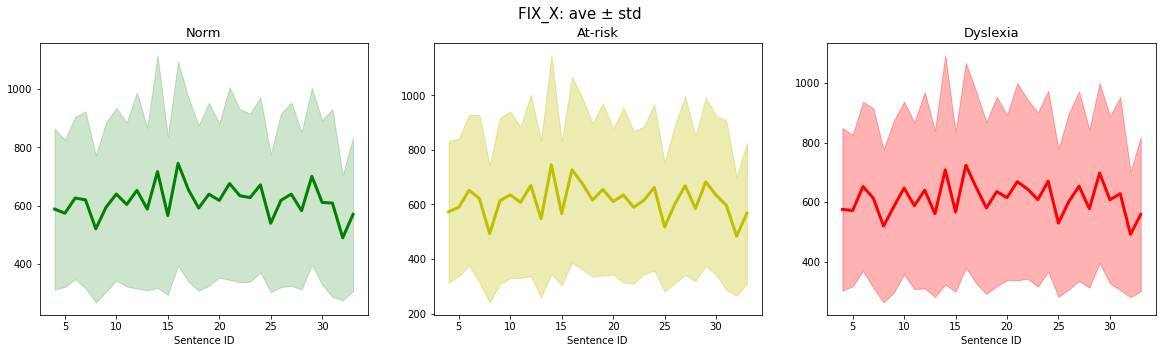

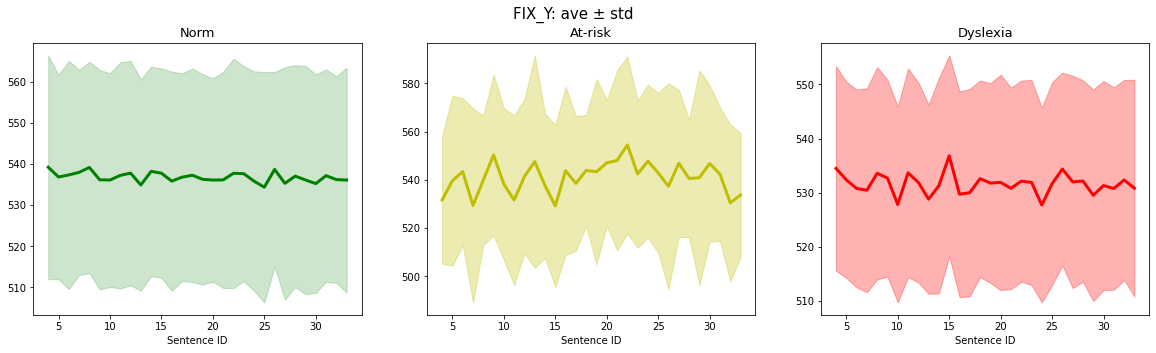

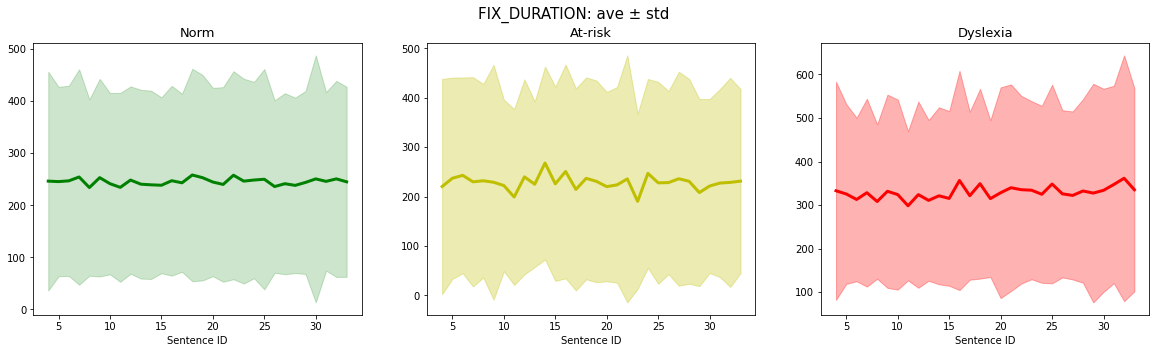

In [35]:


for f in norm_means[0].index:
    
    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(1, 3, 1)
    x = range(4, 34)
    nm = pd.concat(norm_means, axis=1).T
    ns = pd.concat(norm_stds, axis=1).T
    ax.plot(x, 
            nm[f].values, 
            color="g", 
            linewidth=3
           )
    ax.fill_between(x, 
                    nm[f].values+ns[f].values, 
                    nm[f].values-ns[f].values,
                    alpha=0.2,
                    color="g",
                   )
    ax.set_title("Norm", fontsize=13, )
    plt.xlabel("Sentence ID")
    
    ax = fig.add_subplot(1, 3, 2)
    rm = pd.concat(risk_means, axis=1).T
    rs = pd.concat(risk_stds, axis=1).T
    ax.plot(x, rm[f].values, 
            color="y", linewidth=3
           )
    ax.fill_between(x, 
                    rm[f].values+rs[f].values, 
                    rm[f].values-rs[f].values,
                    alpha=0.3,
                    color="y",
                    )
    ax.set_title("At-risk", fontsize=13, )
    plt.xlabel("Sentence ID")
    
    ax = fig.add_subplot(1, 3, 3)
    dm = pd.concat(dyslexia_means, axis=1).T
    ds = pd.concat(dyslexia_stds, axis=1).T
    ax.plot(x, dm[f].values, color="r", linewidth=3)
    ax.fill_between(x, 
                    dm[f].values+ds[f].values, 
                    dm[f].values-ds[f].values,
                    alpha=0.3,
                    color="r",
                    )
    ax.set_title("Dyslexia", fontsize=13)
    plt.xlabel("Sentence ID")
    
    fig.suptitle(f + ": ave ± std", fontsize=15)

   
    plt.show()




### Conclusion:

- Y coordinate is more important than X - Obviously, Fixation duration;

- In normal participants is lower than dyslexia ones. (though for the at-risk group it's a bit more complicated)